# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #pprint(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lionel town
Processing Record 2 of Set 1 | yanam
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | lewistown
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | kaffrine
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | sumenep
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | bontang
Processing Record 14 of Set 1 | grand forks
Processing Record 15 of Set 1 | tofol
Processing Record 16 of Set 1 | manado
Processing Record 17 of Set 1 | boguchany
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | domna
Processing Record 22 of Set 1 | qala i naw
Processing Record 23 o

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lionel town,17.8101,-77.2406,84.07,61,36,14.32,JM,1738340653
1,yanam,16.7333,82.2167,67.84,98,18,0.40,IN,1738340655
2,puerto natales,-51.7236,-72.4875,63.05,36,75,29.93,CL,1738340361
3,georgetown,5.4112,100.3354,82.33,56,20,9.22,MY,1738340379
4,lewistown,40.5992,-77.5714,36.61,100,100,0.00,US,1738340390


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lionel town,17.8101,-77.2406,84.07,61,36,14.32,JM,1738340653
1,yanam,16.7333,82.2167,67.84,98,18,0.40,IN,1738340655
2,puerto natales,-51.7236,-72.4875,63.05,36,75,29.93,CL,1738340361
3,georgetown,5.4112,100.3354,82.33,56,20,9.22,MY,1738340379
4,lewistown,40.5992,-77.5714,36.61,100,100,0.00,US,1738340390


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

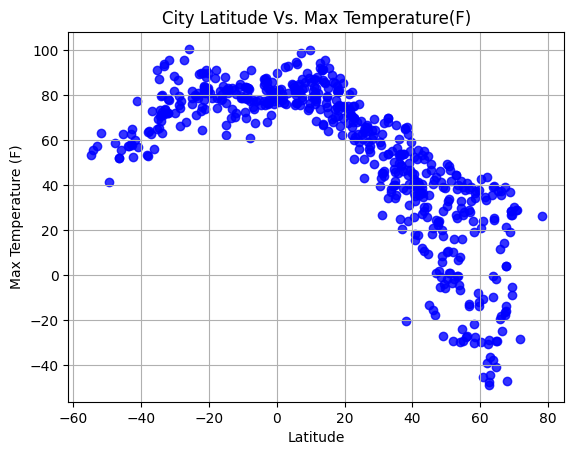

In [40]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lat,
            max_temps,
           facecolor="blue", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(F)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

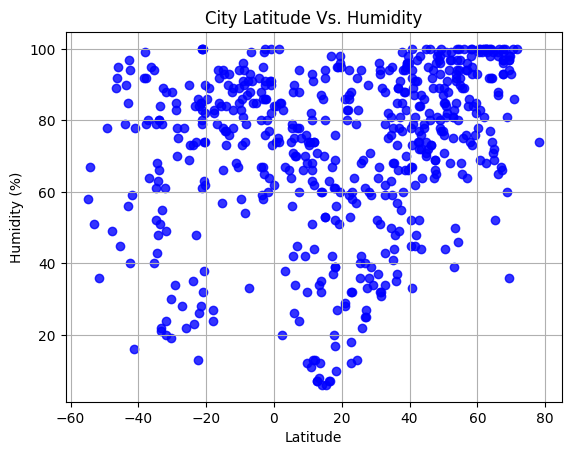

In [19]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

plt.scatter(lat,
            humidity,
           facecolor="blue", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

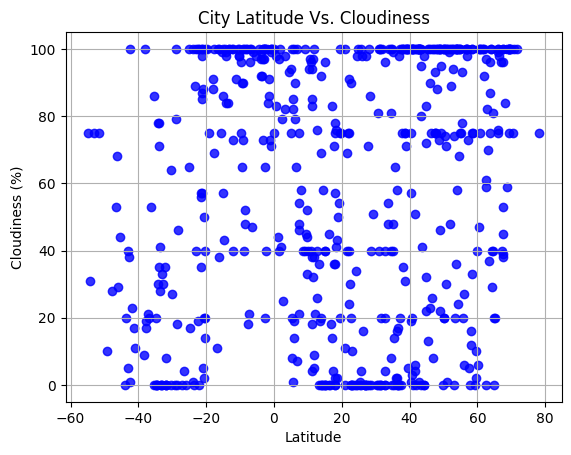

In [20]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df['Cloudiness']

plt.scatter(lat,
            clouds,
           facecolor="blue", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

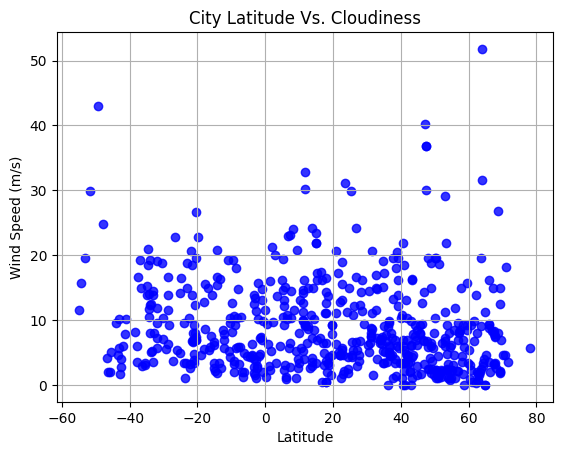

In [21]:
wind = city_data_df['Wind Speed']

plt.scatter(lat,
            wind,
           facecolor="blue", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values): 
    slope, intercept, r_value, p_value, std_err = linregress(x_values,y_values)
    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lionel town,17.8101,-77.2406,84.07,61,36,14.32,JM,1738340653
1,yanam,16.7333,82.2167,67.84,98,18,0.40,IN,1738340655
3,georgetown,5.4112,100.3354,82.33,56,20,9.22,MY,1738340379
4,lewistown,40.5992,-77.5714,36.61,100,100,0.00,US,1738340390
6,kaffrine,14.1059,-15.5508,95.54,6,0,14.94,SN,1738340660


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,63.05,36,75,29.93,CL,1738340361
5,adamstown,-25.0660,-130.1015,76.10,69,100,14.23,PN,1738340659
7,waitangi,-43.9535,-176.5597,57.34,79,0,9.55,NZ,1738340662
8,sumenep,-7.0167,113.8667,77.65,88,100,10.54,ID,1738340663
9,souillac,-20.5167,57.5167,82.78,74,20,6.91,MU,1738340664


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8374821223850377


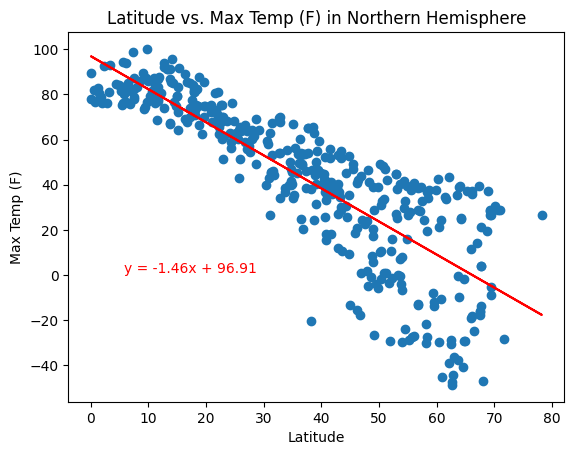

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8,0.8), fontsize=10, color="red")
plt.title("Latitude vs. Max Temp (F) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.5481834859320699


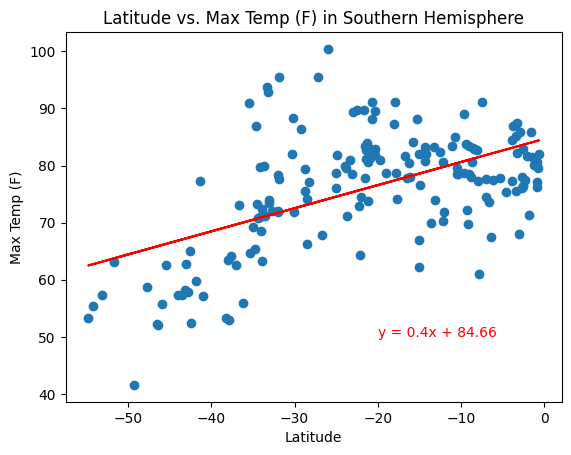

In [53]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,50), fontsize=10, color="red")
plt.title("Latitude vs. Max Temp (F) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** As the degress of latitude near 0, or the Equator, the Max Temps for both Southern and Northern Hemispheres tends to increase. The Southern Hemisphere has a weaker correlation, r value of .54, than the Northern Hemisphere, r value of -.83.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.46382966386190205


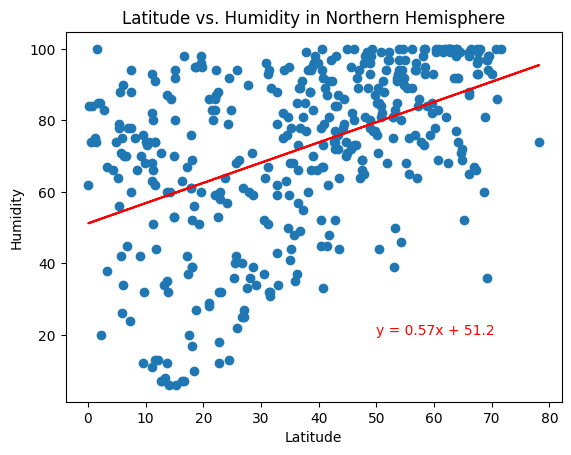

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize=10, color="red")
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.2890413712652018


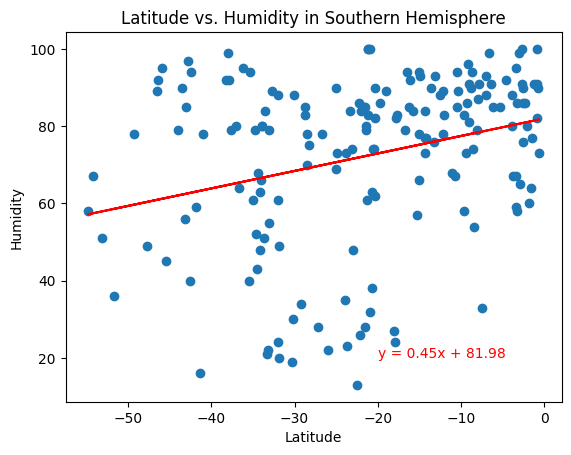

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize=10, color="red")
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is weak correlation between Latitude and Humidity in both the Northern and Southern Hemispheres, r values = .46 and .29 respectively. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2410912340706174


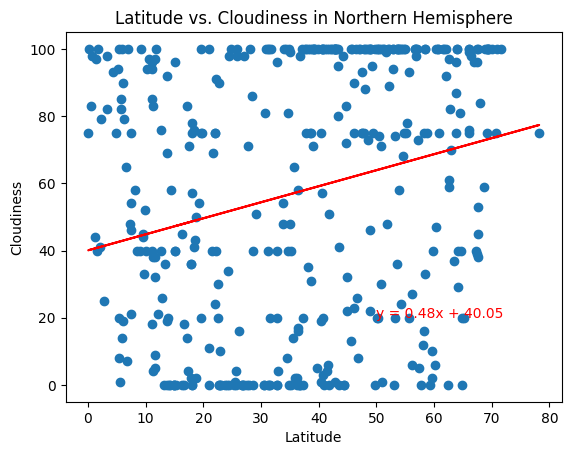

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize=10, color="red")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.5546487616787987


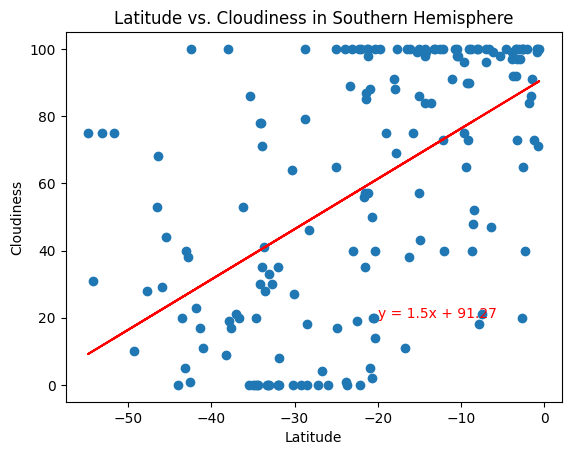

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize=10, color="red")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a moderate correlation in the Southern Hemisphere between the latitude and cloudiness, r value of .55. There is a weak correlation for the Northern hemisphere, r value .24. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.1520875615812658


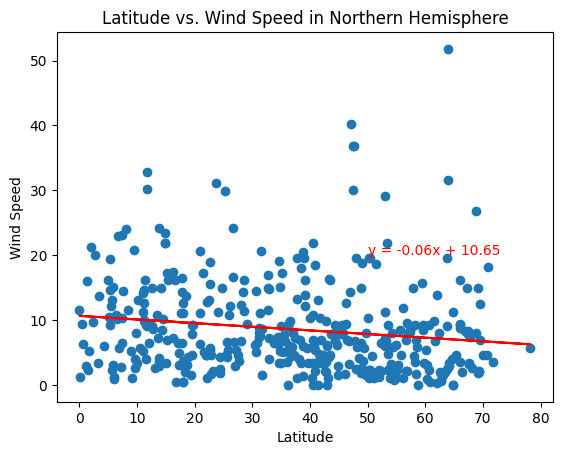

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize=10, color="red")
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.2512561797454166


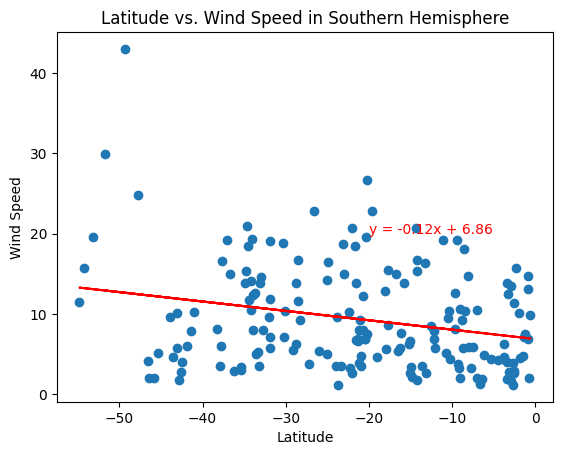

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize=10, color="red")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is weak correlation between latitude and wind speed in both hemispheres, -.15 for Northern and -.25 for Southern. 